In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA CLEANING AND MANIPULATION

In [11]:
loan = pd.read_csv("./loan.csv")

## More columns have null values in all of their cells 
## Removing columns containing all null values 
loan=loan.dropna(axis=1,how='all')   

## Extracted required variables(columns) from above modified loan data
data1=loan.iloc[:,2:25]                
data2= loan.iloc[:,52:57]

## Merged above two data1, data2
finalloan=pd.concat([data1,data2],axis=1)

print('finalloan column names\n',finalloan.columns)

finalloan column names
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')


In [12]:
## converted the interest rate to float type and removed % sign
finalloan.int_rate=finalloan.int_rate.apply(lambda x:float(x[0:-1:1]))   

## converted to standard date format
finalloan['issue_d']=pd.to_datetime(finalloan.issue_d, format='%b-%y', yearfirst=False)

## created year column and month column
finalloan['year']=finalloan.issue_d.dt.year 
finalloan['month']= finalloan.issue_d.dt.month

# checking for sanity on funded amount and funded_amnt_inv
A=finalloan[finalloan['funded_amnt_inv']>finalloan['loan_amnt']].value_counts().sum()
print('invalid rows are',A)
B=finalloan[finalloan['funded_amnt']>finalloan['loan_amnt']].value_counts().sum() 
print('invalid rows are',B)

print('Null values sum in each cloumn\n',finalloan.isnull().sum())

invalid rows are 0
invalid rows are 0
Null values sum in each cloumn
 loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2459
emp_length                   1075
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12940
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
acc_now_delinq                  0
chargeoff_within_12_mths       56
delinq_amnt                     0
pub_rec_bankruptcies          697
tax_liens   

In [13]:
# finding missing values percentage 
missingvalues_percent=round((finalloan.isnull().sum()/finalloan.shape[0])*100,2)  
print('Missing values percentage of each column\n',missingvalues_percent)

# filtered the charged off and fully paid from loan status columns
finalloan=finalloan[finalloan['loan_status']!='Current']                          

print('loan status is',finalloan.loan_status.value_counts())

Missing values percentage of each column
 loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
desc                        32.58
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
acc_now_delinq               0.00
chargeoff_within_12_mths     0.14
delinq_amnt                  0.00
pub_rec_bankruptcies         1.75
tax_liens                    0.10
year  

In [14]:
## after filtering the loanstatus, final loan data null value sum in columns
print(finalloan.isnull().sum())

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                    2386
emp_length                   1033
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
desc                        12527
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
acc_now_delinq                  0
chargeoff_within_12_mths       56
delinq_amnt                     0
pub_rec_bankruptcies          697
tax_liens                      39
year                            0
month         

## DATA IMPUTATION

In [15]:
## Substituting the missed values data by mode
finalloan['emp_title']=finalloan['emp_title'].fillna(finalloan['emp_title'].mode()[0])
finalloan['emp_length']=finalloan['emp_length'].fillna(finalloan['emp_length'].mode()[0])
finalloan['title']=finalloan['title'].fillna(finalloan['title'].mode()[0])
finalloan['chargeoff_within_12_mths']=finalloan['chargeoff_within_12_mths'].fillna(finalloan['chargeoff_within_12_mths'].mode()[0])
finalloan['pub_rec_bankruptcies']=finalloan['pub_rec_bankruptcies'].fillna(finalloan['pub_rec_bankruptcies'].mode()[0])
finalloan['tax_liens']=finalloan['tax_liens'].fillna(finalloan['tax_liens'].mode()[0])
finalloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 38577 non-null  int64         
 1   funded_amnt               38577 non-null  int64         
 2   funded_amnt_inv           38577 non-null  float64       
 3   term                      38577 non-null  object        
 4   int_rate                  38577 non-null  float64       
 5   installment               38577 non-null  float64       
 6   grade                     38577 non-null  object        
 7   sub_grade                 38577 non-null  object        
 8   emp_title                 38577 non-null  object        
 9   emp_length                38577 non-null  object        
 10  home_ownership            38577 non-null  object        
 11  annual_inc                38577 non-null  float64       
 12  verification_statu

In [16]:
## Checking for duplication of rows
duplicate= finalloan.duplicated()
duplicate.sum()

0

### CHECKING FOR OUTLIERS IN DATA

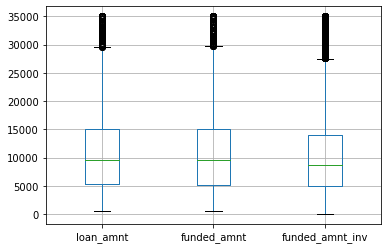

In [17]:
## BOX PLOT for loan amount,funded amount,funded amount inv
finalloan.boxplot(['loan_amnt','funded_amnt','funded_amnt_inv'])
plt.show()

In [18]:
## Checking for outliers
Outlier1_loan_amnt= finalloan.loan_amnt.quantile([0,0.1,0.25,0.5,0.75,0.85,0.9,0.95,0.98,0.99])
Outlier2_funded_amnt= finalloan.funded_amnt.quantile([0,0.1,0.25,0.5,0.75,0.85,0.9,0.95,0.98,0.99])
print('loan_amnt percentiles\n',Outlier1_loan_amnt)
print('funded_amnt percentiles\n',Outlier2_funded_amnt)

loan_amnt percentiles
 0.00      500.0
0.10     3090.0
0.25     5300.0
0.50     9600.0
0.75    15000.0
0.85    20000.0
0.90    21600.0
0.95    25000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64
funded_amnt percentiles
 0.00      500.0
0.10     3000.0
0.25     5200.0
0.50     9550.0
0.75    15000.0
0.85    18000.0
0.90    20000.0
0.95    25000.0
0.98    30000.0
0.99    35000.0
Name: funded_amnt, dtype: float64


#### Since there is no much variation in both datas , no need to filter the data

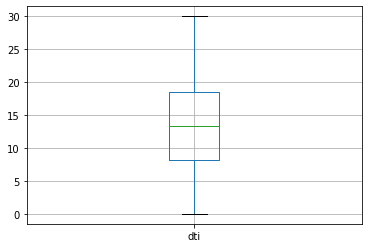

In [19]:
# box plot for checking outliers in dti
finalloan.boxplot(['dti'])
plt.show()

In [20]:
Outlier3_dti= finalloan.dti.quantile([0,0.1,0.25,0.5,0.75,0.85,0.9,0.95,0.98,0.99])
print('dti\n',Outlier3_dti)

dti
 0.00     0.00
0.10     4.06
0.25     8.13
0.50    13.37
0.75    18.56
0.85    20.92
0.90    22.29
0.95    23.80
0.98    24.85
0.99    26.53
Name: dti, dtype: float64


##### distribution of dti data is in acceptable range

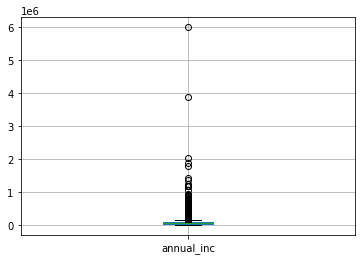

In [21]:
# box plot for checking outliers in annual income
finalloan.boxplot(['annual_inc'])
plt.show()

In [22]:
Outlier4_annualinc= finalloan.annual_inc.quantile([0,0.1,0.25,0.5,0.75,0.85,0.9,0.94,0.95,0.98,0.99])
print('annula income quantiles:\n',Outlier4_annualinc)

annula income quantiles:
 0.00      4000.0
0.10     30000.0
0.25     40000.0
0.50     58868.0
0.75     82000.0
0.85    100000.0
0.90    115000.0
0.94    134000.0
0.95    140004.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64


#####  Annual income has uneven or improper distribution above 95 percentile, so we will filter annual_inc

In [24]:
## filtering the annual income less than or equal to 95 percentile 
finalloan=finalloan[finalloan.annual_inc<=Outlier4_annualinc[0.95]]


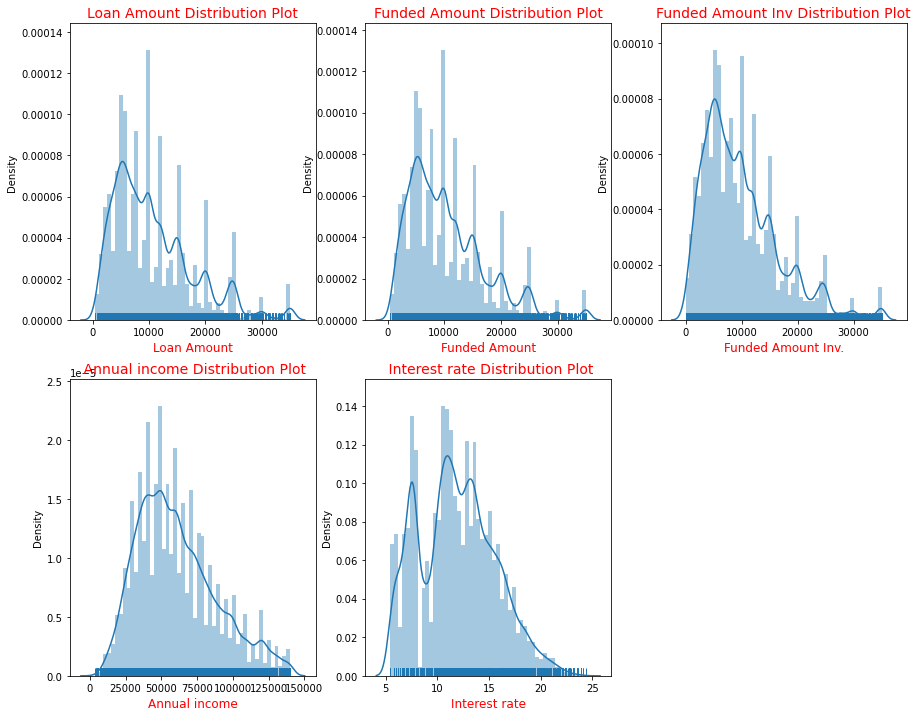

In [25]:
plt.figure(figsize=(15,12),)
##fig,ax=plt.subplots(ncols=3,nrows=2,sharex=True,sharey=True)
plt.subplot(2,3,1)
ax=sns.distplot(finalloan.loan_amnt,kde=True,rug=True)
ax.set_title('Loan Amount Distribution Plot',fontsize=14,color='r')
ax.set_xlabel('Loan Amount',fontsize=12,color='r')

plt.subplot(2,3,2)
ax=sns.distplot(finalloan.funded_amnt,kde=True,rug=True)
ax.set_title('Funded Amount Distribution Plot',fontsize=14,color='r')
ax.set_xlabel('Funded Amount',fontsize=12,color='r')
plt.subplot(2,3,3)
ax=sns.distplot(finalloan.funded_amnt_inv,kde=True,rug=True)
ax.set_title('Funded Amount Inv Distribution Plot',fontsize=14,color='r')
ax.set_xlabel('Funded Amount Inv.',fontsize=12,color='r')

plt.subplot(2,3,4)
ax=sns.distplot(finalloan.annual_inc,kde=True,rug=True)
ax.set_title(' Annual income Distribution Plot',fontsize=14,color='r')
ax.set_xlabel('Annual income',fontsize=12,color='r')

plt.subplot(2,3,5)
ax=sns.distplot(finalloan.int_rate,kde=True,rug=True)
ax.set_title(' Interest rate Distribution Plot',fontsize=14,color='r')
ax.set_xlabel('Interest rate',fontsize=12,color='r')

plt.show()

#### From above graphs the distribution seems fair and can continue to use these data for analysis purpose


## Analysis of the various variables on the target variable loan_status

## LOAN STATUS


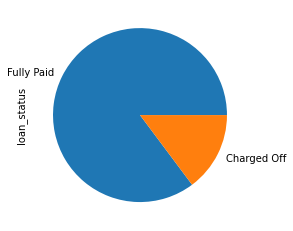

In [26]:

finalloan.loan_status.value_counts().plot.pie()
plt.show()


<AxesSubplot:>

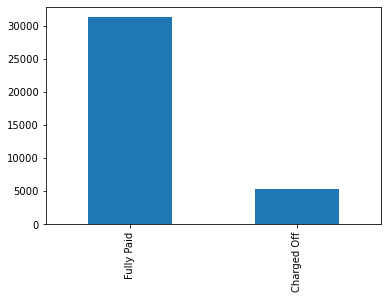

In [27]:
finalloan.loan_status.value_counts().plot.bar()

## verification_status

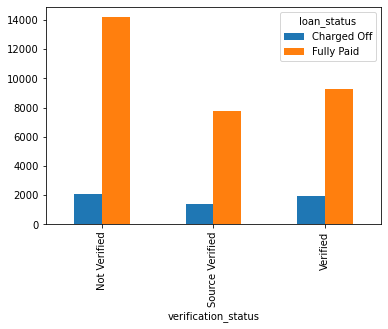

In [28]:
finalloan.groupby('verification_status')['loan_status'].value_counts().unstack().plot.bar()
plt.show()

#####  charge off for non-verified by Lending club is more and for source verified is less

## term

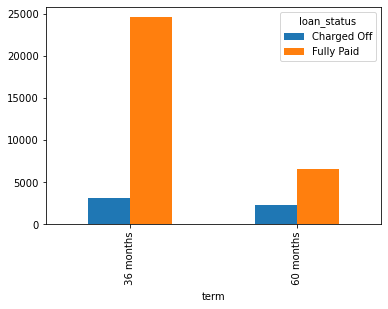

In [29]:
finalloan.groupby('term')['loan_status'].value_counts().unstack().plot.bar()
plt.show()

#####  Default loans are there more for applicants who took loan for short term 36 months

## funded_amnt

In [30]:
finalloan['funded_amnt_bins']=pd.cut(finalloan.funded_amnt,5)
finalloan['funded_amnt_bins']

0          (465.5, 7400.0]
1          (465.5, 7400.0]
2          (465.5, 7400.0]
3        (7400.0, 14300.0]
5          (465.5, 7400.0]
               ...        
39711      (465.5, 7400.0]
39712      (465.5, 7400.0]
39713    (7400.0, 14300.0]
39714      (465.5, 7400.0]
39716    (7400.0, 14300.0]
Name: funded_amnt_bins, Length: 36654, dtype: category
Categories (5, interval[float64, right]): [(465.5, 7400.0] < (7400.0, 14300.0] < (14300.0, 21200.0] < (21200.0, 28100.0] < (28100.0, 35000.0]]

<AxesSubplot:xlabel='funded_amnt_bins'>

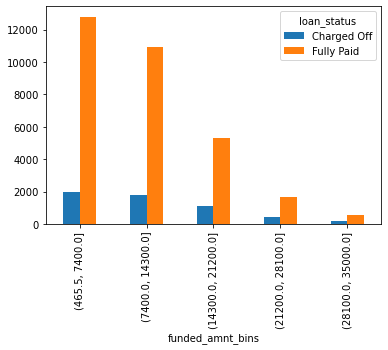

In [31]:
finalloan.groupby('funded_amnt_bins')['loan_status'].value_counts().unstack().plot(kind='bar')

#### More charge off's for funded amounts in low range

### Loan Amount

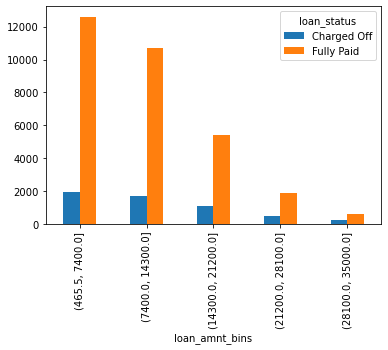

In [32]:
finalloan['loan_amnt_bins']=pd.cut(finalloan.loan_amnt,5)
finalloan.groupby('loan_amnt_bins')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

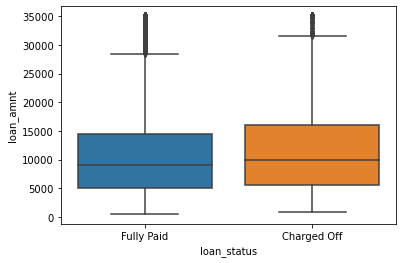

In [33]:
sns.boxplot(data=finalloan, x='loan_status',y='loan_amnt')
plt.show()

#### For applied loan between 5000 to 15500, the charge off is more. chrage off is less for higher loan amounts

## Annual Income


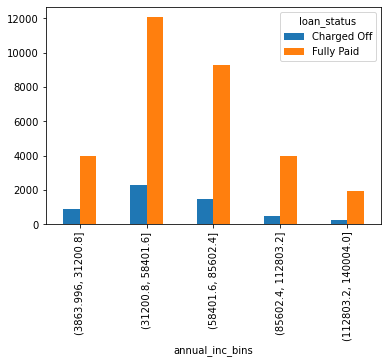

In [34]:
## created annual income bins and plotted
finalloan['annual_inc_bins']=pd.cut(finalloan.annual_inc,5)
finalloan.groupby('annual_inc_bins')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

##### The defaulters are more when the applicant's annual income is between 30000 to 58000

## Interest Rates

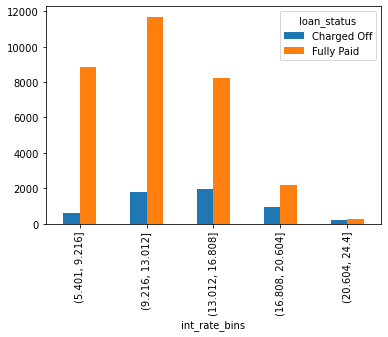

In [35]:
# creating interest rate bins and plotting 
finalloan['int_rate_bins']=pd.cut(finalloan.int_rate,5)
finalloan.groupby('int_rate_bins')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

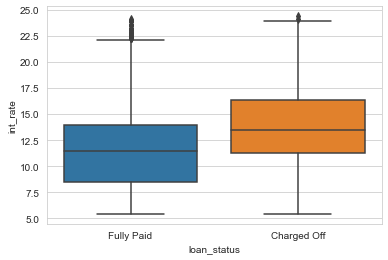

In [271]:
sns.boxplot(data=finalloan, x='loan_status',y='int_rate')
plt.show()

##### If the interest rates are between 12-16 percentages, loans are likely to be defaulted

##  EMPLOYEE LENGTH 

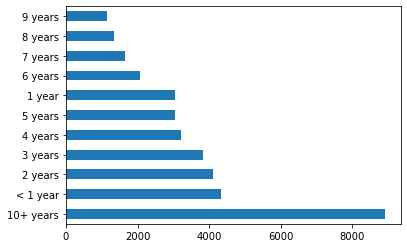

In [36]:
## 
finalloan.emp_length.value_counts().plot.barh()
plt.show()

<AxesSubplot:xlabel='emp_length'>

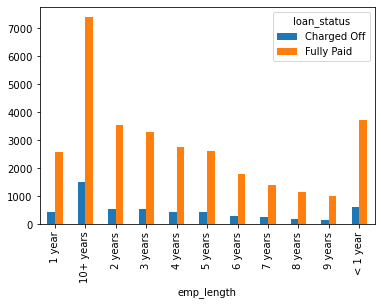

In [37]:
finalloan.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar')

##### Employees with 10 or more than 10 years are repaying full amounts but also had high charge off's

## Home Ownership

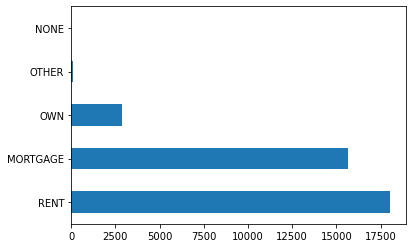

In [38]:
finalloan.home_ownership.value_counts().plot.barh()
plt.show()

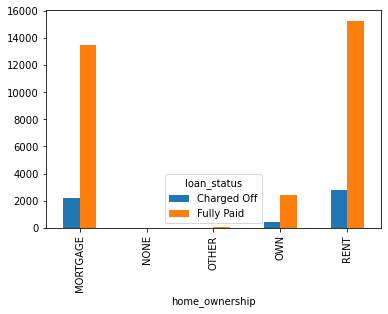

In [39]:
finalloan.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

##### Rented  and Mortgage appplicants are having high charge off's than applicants who owned home

## PURPOSE


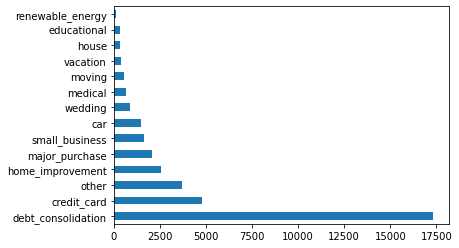

In [40]:
finalloan.purpose.value_counts().plot.barh()
plt.show()

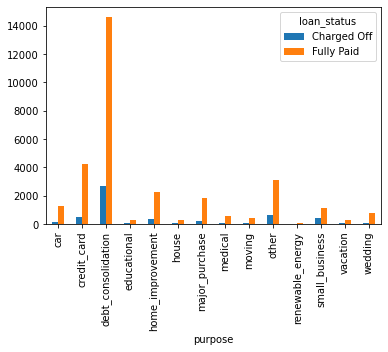

In [109]:
finalloan.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

##### loans taken for clearing debts are defaulted more

## GRADES

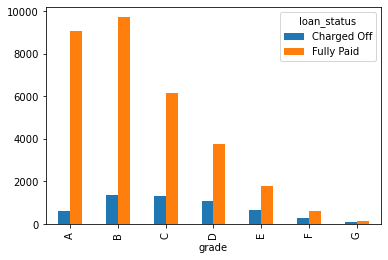

In [41]:
finalloan.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

##### Grade B and C people have more default status

## DTI

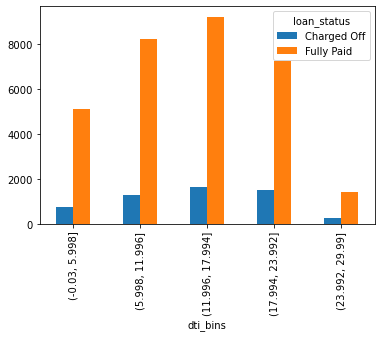

In [42]:

finalloan['dti_bins']=pd.cut(finalloan.dti,5)
finalloan.groupby('dti_bins')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()
#pd.cut(finalloan.dti,5).value_counts()

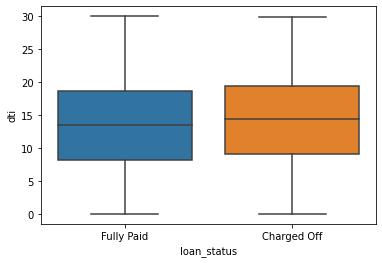

In [43]:
sns.boxplot(data=finalloan, x='loan_status',y='dti')
plt.show()

#### If the dti is between 8-18, then high chances are there for charge off

## pub_rec_bankruptcies

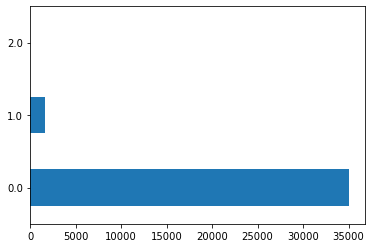

In [44]:
finalloan.pub_rec_bankruptcies.value_counts().plot.barh()
plt.show()

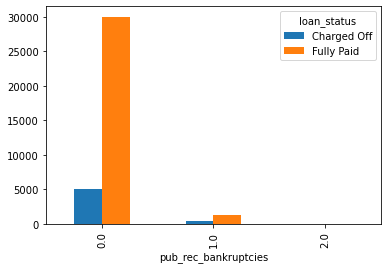

In [45]:
finalloan.groupby('pub_rec_bankruptcies')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Even  If record of bankrupticies is 0 there is high chance of charge off


## YEAR

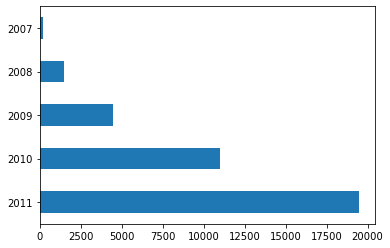

In [46]:
finalloan.year.value_counts().plot.barh()
plt.show()

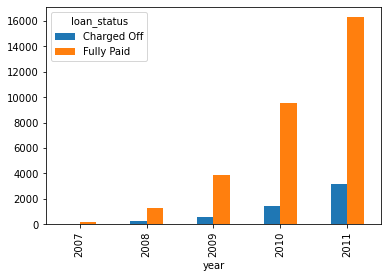

In [47]:
finalloan.groupby('year')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

## MONTH

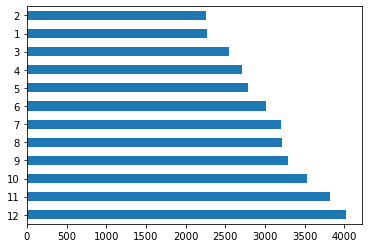

In [117]:
finalloan.month.value_counts().plot.barh()
plt.show()

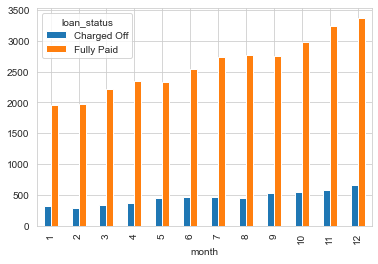

In [274]:
finalloan.groupby('month')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Charge off's are increasing every year. IN 2011, more loans are given but also have more charge off's
For loans given in month of december, the loan defaults are more

## Loan vs Annual Income

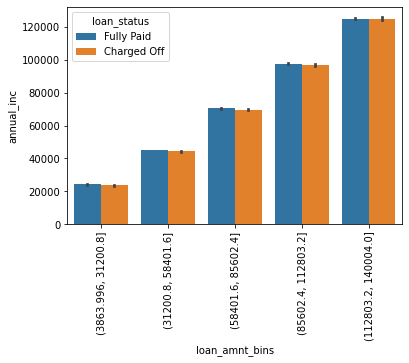

In [124]:
sns.barplot(data=finalloan,y='annual_inc',x='loan_amnt_bins',hue='loan_status')
plt.xticks(rotation=90)
plt.show()

## Home Ownership vs Annual Income

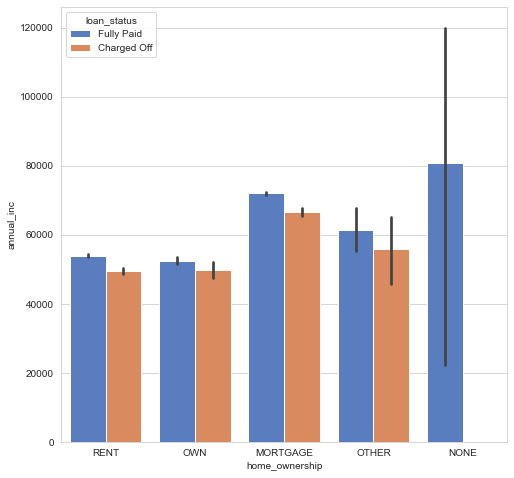

In [280]:
plt.figure(figsize=(8,8))
sns.barplot(data=finalloan,x='home_ownership',y='annual_inc',hue='loan_status',palette='muted')
plt.show()

######  Higher annual income with Home on mortgage will default more

## DTI vs Annual Income

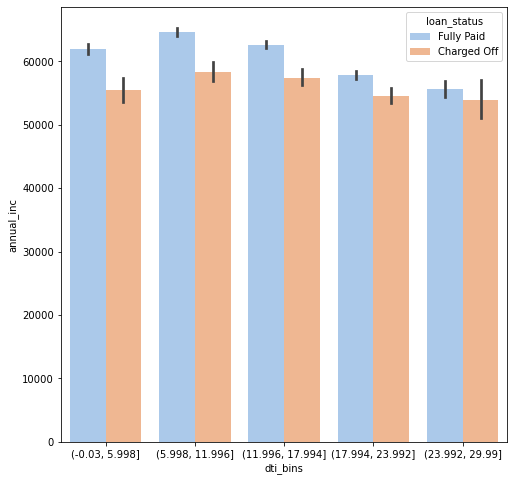

In [122]:
plt.figure(figsize=(8,8))
sns.barplot(data=finalloan,x='dti_bins',y='annual_inc',hue='loan_status',palette='pastel')
plt.show()

##### Higher income group with 6-12 dti have more charge off's

## Purpose vs Annual Income

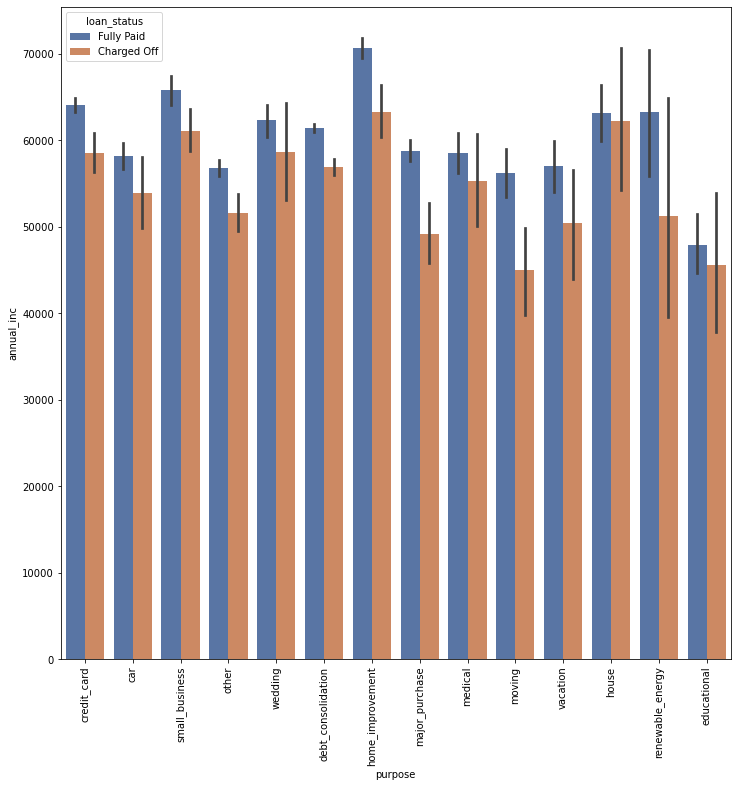

In [129]:
plt.figure(figsize=(12,12))
sns.barplot(data=finalloan,x='purpose',y='annual_inc',hue='loan_status',palette='deep')
plt.xticks(rotation=90)
plt.show()

#### people  taking loan for home improvement with annual come more than 60000 are likely to default loans

## Interest Rate vs Annual Income

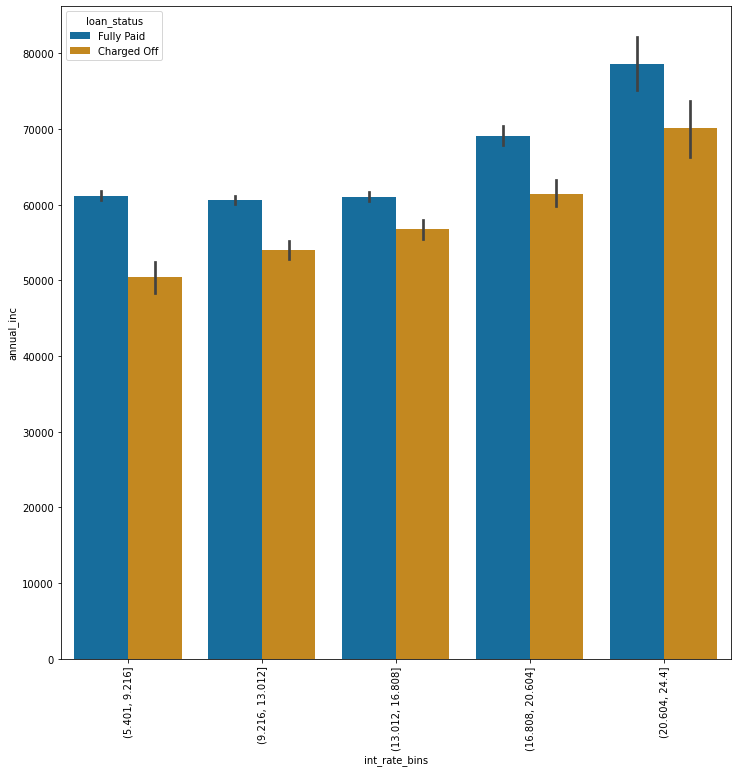

In [131]:
plt.figure(figsize=(12,12))
sns.barplot(data=finalloan,x='int_rate_bins',y='annual_inc',hue='loan_status',palette='colorblind')
plt.xticks(rotation=90)
plt.show()

##### Loans taken for high interest rate 20-24 percent  with annual income more than 70000 have more charge off's

## Loan  Amount vs Purpose

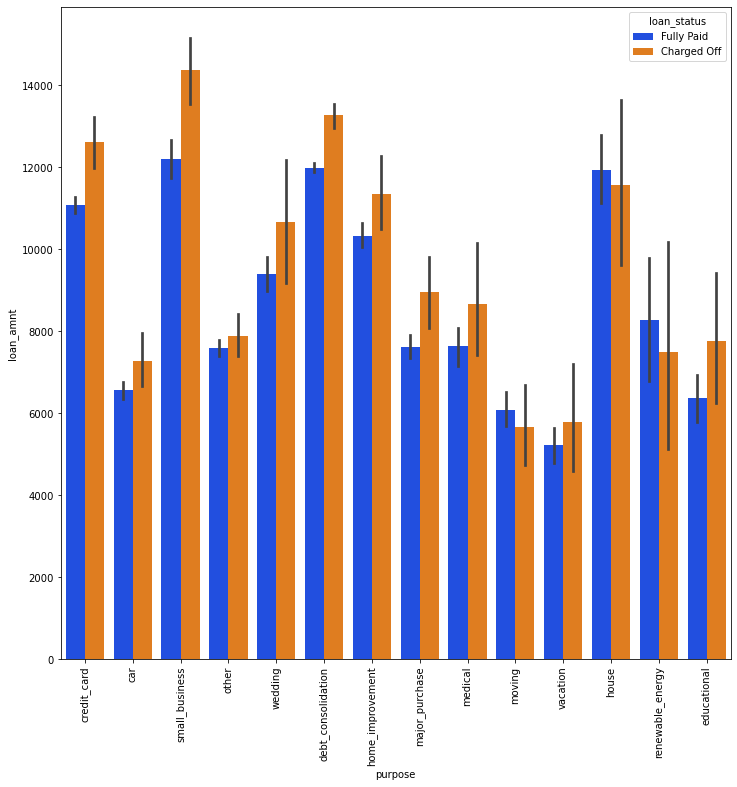

In [135]:
plt.figure(figsize=(12,12))
sns.barplot(data=finalloan,x='purpose',y='loan_amnt',hue='loan_status',palette='bright')
plt.xticks(rotation=90)
plt.show()

#### Loans taken for small business with applied loan 14000 are likely to default

## Loan Amount Vs Home Ownership

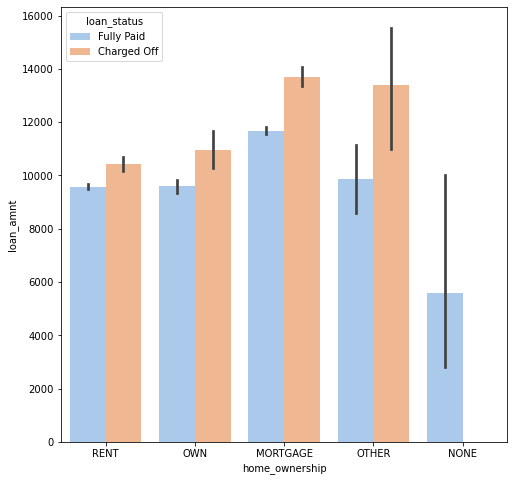

In [134]:
plt.figure(figsize=(8,8))
sns.barplot(data=finalloan,x='home_ownership',y='loan_amnt',hue='loan_status',palette='pastel')
plt.show()

##### People  taking loan above 14000  with home on mortgage will charge off

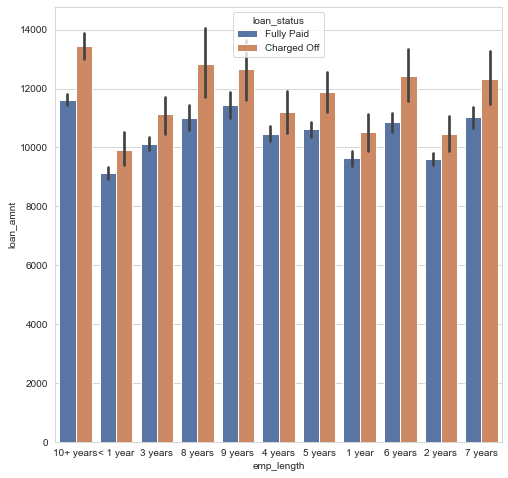

In [279]:
plt.figure(figsize=(8,8))
sns.barplot(data=finalloan,x='emp_length',y='loan_amnt',hue='loan_status',palette='deep')
plt.show()

## YEAR Vs Interest Rate

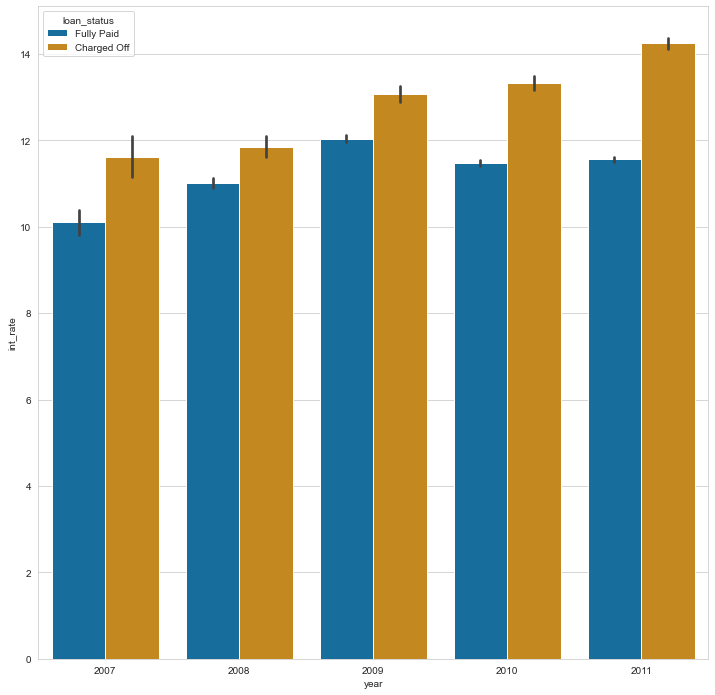

In [255]:
plt.figure(figsize=(12,12))
sns.barplot(data=finalloan,x='year',y='int_rate',hue='loan_status',palette='colorblind')
plt.xticks(rotation=0)
plt.show()

## YEAR Vs Loan

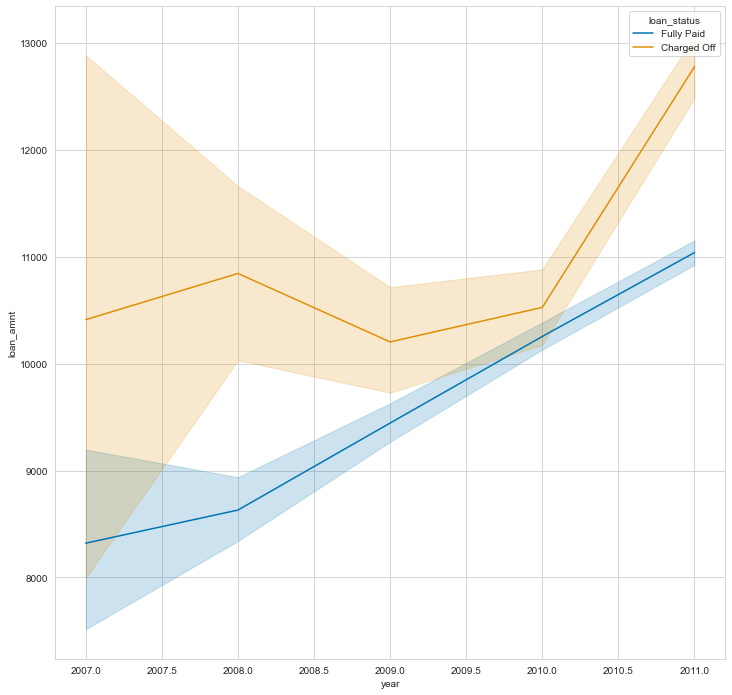

In [260]:
plt.figure(figsize=(12,12))
sns.lineplot(data=finalloan,x='year',y='loan_amnt',hue='loan_status',palette='colorblind')
plt.xticks(rotation=0)
plt.show()